In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.0.0


In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [42]:
observations = 1000
xs = np.random.uniform(low=-10, high = 10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs, zs))
noise = np.random.uniform(-1,1,(observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

#for tensorflow, save data as .npz
#tensors represented as n-dimensional arrays
np.savez("TF_intro", inputs=generated_inputs, targets=generated_targets)

In [43]:
training_data = np.load("TF_intro.npz")

In [41]:
input_size = 2
output_size = 1

#define the model
#dense calculates the dot square product of inputs and weights and adds the bias
#specify output size, i.e. number of variables
model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size)
     ])

#specify the objective function (loss) and the optimization algorithm (optimizer)
model.compile(optimizer="sgd", loss="mean_squared_error")

#fit the data with the inputs and targets, epochs = iterations
model.fit(training_data["inputs"], training_data["targets"], epochs=100, verbose=2)

Train on 1000 samples
Epoch 1/100
1000/1000 - 0s - loss: 23.0503
Epoch 2/100
1000/1000 - 0s - loss: 4.3850
Epoch 3/100
1000/1000 - 0s - loss: 1.4689
Epoch 4/100
1000/1000 - 0s - loss: 0.6609
Epoch 5/100
1000/1000 - 0s - loss: 0.4333
Epoch 6/100
1000/1000 - 0s - loss: 0.3759
Epoch 7/100
1000/1000 - 0s - loss: 0.3549
Epoch 8/100
1000/1000 - 0s - loss: 0.3456
Epoch 9/100
1000/1000 - 0s - loss: 0.3518
Epoch 10/100
1000/1000 - 0s - loss: 0.3492
Epoch 11/100
1000/1000 - 0s - loss: 0.3584
Epoch 12/100
1000/1000 - 0s - loss: 0.3501
Epoch 13/100
1000/1000 - 0s - loss: 0.3497
Epoch 14/100
1000/1000 - 0s - loss: 0.3521
Epoch 15/100
1000/1000 - 0s - loss: 0.3481
Epoch 16/100
1000/1000 - 0s - loss: 0.3569
Epoch 17/100
1000/1000 - 0s - loss: 0.3485
Epoch 18/100
1000/1000 - 0s - loss: 0.3510
Epoch 19/100
1000/1000 - 0s - loss: 0.3524
Epoch 20/100
1000/1000 - 0s - loss: 0.3518
Epoch 21/100
1000/1000 - 0s - loss: 0.3520
Epoch 22/100
1000/1000 - 0s - loss: 0.3466
Epoch 23/100
1000/1000 - 0s - loss: 0.35

Extract the weights and bias

In [7]:
model.layers[0].get_weights()

[array([[ 2.0362587],
        [-2.9783835]], dtype=float32),
 array([5.023341], dtype=float32)]

In [8]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.0362587],
       [-2.9783835]], dtype=float32)

In [9]:
bias = model.layers[0].get_weights()[1]
bias

array([5.023341], dtype=float32)

Extract the outputs (make predictions)

In [10]:
model.predict_on_batch(training_data['inputs']).numpy().round(1)

array([[ 27.9],
       [ 25.1],
       [-22.9],
       [ 27.1],
       [-20. ],
       [  5.4],
       [-10.2],
       [ -2.7],
       [ 36.9],
       [ 34.3],
       [ -9.5],
       [ 41.6],
       [ 11.3],
       [ 18.5],
       [ 39. ],
       [-13. ],
       [ -4.6],
       [ 28.5],
       [ 44.3],
       [ -8.1],
       [ -9.7],
       [ 39.3],
       [ -8.1],
       [ -4.5],
       [ 18.4],
       [ 10.1],
       [ 45. ],
       [ 28.5],
       [  1. ],
       [ 32.2],
       [  2.2],
       [-23.9],
       [ 27.6],
       [ 20.3],
       [ -3.2],
       [ 34.2],
       [  4.9],
       [ -1.7],
       [-13. ],
       [ 17.8],
       [-26.6],
       [ 17.4],
       [-21.8],
       [ 30.2],
       [ -6.5],
       [ 39.6],
       [-20.5],
       [ 32.8],
       [ 51.5],
       [-11.6],
       [ -0.3],
       [ 34.7],
       [-20.6],
       [  4.2],
       [-15.4],
       [-32.2],
       [-15.4],
       [ 14. ],
       [ 11.9],
       [ 26.2],
       [ 39.8],
       [-16.9],
       [

In [23]:
training_data["targets"].round(1)

array([[-27.3],
       [ 18.8],
       [-30.6],
       [-21.9],
       [  1.3],
       [ -8.8],
       [ 17.9],
       [ 14. ],
       [ -7.1],
       [-22.3],
       [ 24.8],
       [ 18.9],
       [-33.2],
       [-17.4],
       [ 40.9],
       [ 17. ],
       [ 53. ],
       [ 44. ],
       [ 32.3],
       [ 14.6],
       [ 13.7],
       [ 17.8],
       [ 25.8],
       [ 51.3],
       [ -1.5],
       [-11.4],
       [ 20.8],
       [ -2.4],
       [  4. ],
       [ -4.2],
       [ -1.4],
       [ 38.8],
       [ 35. ],
       [ -2.4],
       [ 13.6],
       [-36.4],
       [  3.9],
       [ -9.5],
       [-10.5],
       [-20.4],
       [ -5.2],
       [  3.2],
       [ 17.5],
       [  1.1],
       [-32. ],
       [ -6.7],
       [ -3.8],
       [ 30.2],
       [  1.4],
       [ 10.3],
       [ 24.4],
       [ -4.4],
       [ 27.7],
       [-33. ],
       [ 27.6],
       [-14.6],
       [ 23.5],
       [ 21. ],
       [  0.6],
       [ 24.8],
       [-17.6],
       [ -5.5],
       [

Plotting the outputs against the data

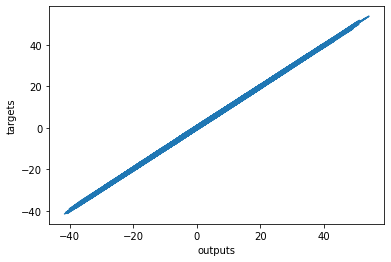

In [24]:
plt.plot(np.squeeze(model.predict_on_batch(training_data["inputs"])), np.squeeze(training_data["targets"]))
plt.xlabel("outputs")
plt.ylabel("targets")
plt.show()

In [44]:
input_size = 2
output_size = 1

#define the model
#dense calculates the dot square product of inputs and weights and adds the bias
#specify output size, i.e. number of variables
#in this model, kernel (weights) and bias initializer are also specified
model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size,
                         kernel_initializer = tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                         bias_initializer = tf.random_uniform_initializer(minval=-0.1, maxval=0.1) 
                         )
     ])

#specify custom optimizer
custom_optimizer = tf.keras.optimizers.SGD(learning_rate = 0.02)

#specify the objective function (loss) and the optimization algorithm (optimizer)
model.compile(optimizer=custom_optimizer, loss="mean_squared_error")

#fit the data with the inputs and targets, epochs = iterations
model.fit(training_data["inputs"], training_data["targets"], epochs=100, verbose=2)

Train on 1000 samples
Epoch 1/100
1000/1000 - 1s - loss: 10.9302
Epoch 2/100
1000/1000 - 0s - loss: 4.2031
Epoch 3/100
1000/1000 - 0s - loss: 3.4417
Epoch 4/100
1000/1000 - 0s - loss: 2.8207
Epoch 5/100
1000/1000 - 0s - loss: 2.2104
Epoch 6/100
1000/1000 - 0s - loss: 1.6060
Epoch 7/100
1000/1000 - 0s - loss: 1.0233
Epoch 8/100
1000/1000 - 0s - loss: 0.5815
Epoch 9/100
1000/1000 - 0s - loss: 0.3259
Epoch 10/100
1000/1000 - 0s - loss: 0.2281
Epoch 11/100
1000/1000 - 0s - loss: 0.1886
Epoch 12/100
1000/1000 - 0s - loss: 0.1740
Epoch 13/100
1000/1000 - 0s - loss: 0.1710
Epoch 14/100
1000/1000 - 0s - loss: 0.1724
Epoch 15/100
1000/1000 - 0s - loss: 0.1686
Epoch 16/100
1000/1000 - 0s - loss: 0.1727
Epoch 17/100
1000/1000 - 0s - loss: 0.1690
Epoch 18/100
1000/1000 - 0s - loss: 0.1687
Epoch 19/100
1000/1000 - 0s - loss: 0.1704
Epoch 20/100
1000/1000 - 0s - loss: 0.1671
Epoch 21/100
1000/1000 - 0s - loss: 0.1684
Epoch 22/100
1000/1000 - 0s - loss: 0.1702
Epoch 23/100
1000/1000 - 0s - loss: 0.16

In [45]:
model.layers[0].get_weights()

[array([[ 1.97638 ],
        [-3.032783]], dtype=float32),
 array([5.009392], dtype=float32)]

In [46]:
model.predict_on_batch(training_data['inputs']).numpy().round(1)

array([[-18.5],
       [ 11.4],
       [ 21.6],
       [-27.3],
       [ 18.5],
       [ -2.8],
       [ 18.3],
       [  0. ],
       [  3.7],
       [ 28.5],
       [ -1.6],
       [ -6.2],
       [  2.9],
       [-19.6],
       [  9.6],
       [ 23.1],
       [ 13.7],
       [ 28.5],
       [ 11.3],
       [ -8.7],
       [ -8.9],
       [ 26.3],
       [ 16.3],
       [ 23.9],
       [  3. ],
       [ -7.8],
       [-24.9],
       [-33.1],
       [  5.3],
       [  0.9],
       [ -8.7],
       [  6.6],
       [  5.2],
       [-28. ],
       [ 40.5],
       [-13.4],
       [ 39.1],
       [-18. ],
       [ 39.7],
       [  9.5],
       [-12.6],
       [ -4.4],
       [-22.9],
       [-35.9],
       [ -6.4],
       [ 38. ],
       [  6. ],
       [ 14.5],
       [ -1.3],
       [-10.3],
       [ 22.2],
       [-11.1],
       [ -3.2],
       [ 17.8],
       [-17.9],
       [-12.7],
       [ 23. ],
       [  5.2],
       [ -0.1],
       [ -0.3],
       [ 43.5],
       [  7.2],
       [

In [47]:
training_data["targets"].round(1)

array([[-18.4],
       [ 11.2],
       [ 22.1],
       [-27.8],
       [ 18.7],
       [ -2.7],
       [ 17.5],
       [  0.7],
       [  4.5],
       [ 27.5],
       [ -1.1],
       [ -7. ],
       [  3.4],
       [-18.9],
       [ 10.2],
       [ 22.1],
       [ 14. ],
       [ 27.5],
       [ 11.2],
       [ -9.2],
       [ -8.5],
       [ 25.8],
       [ 16.5],
       [ 23.9],
       [  3.7],
       [ -7.9],
       [-25.2],
       [-32.8],
       [  6.1],
       [  0.9],
       [ -9.6],
       [  6.1],
       [  4.8],
       [-27.7],
       [ 41. ],
       [-13.4],
       [ 39.1],
       [-16.9],
       [ 39.6],
       [  8.7],
       [-12.9],
       [ -5. ],
       [-22.1],
       [-36.4],
       [ -7.1],
       [ 38.6],
       [  6.6],
       [ 13.9],
       [ -1.4],
       [-10.4],
       [ 22.6],
       [-11.9],
       [ -3.3],
       [ 18.4],
       [-17.6],
       [-13.3],
       [ 22.3],
       [  6. ],
       [ -0.6],
       [ -1. ],
       [ 43.9],
       [  6.5],
       [

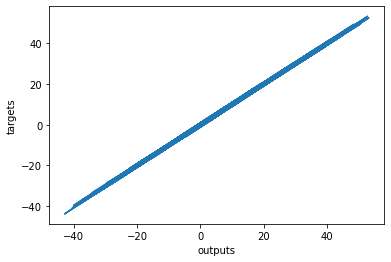

In [38]:
plt.plot(np.squeeze(model.predict_on_batch(training_data["inputs"])), np.squeeze(training_data["targets"]))
plt.xlabel("outputs")
plt.ylabel("targets")
plt.show()